In [1]:
%matplotlib notebook

In [2]:
import pandas as pd #数据分析
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [99]:
0.1%100

0.1

In [125]:
def setBarLabels(axe): 
    from matplotlib.pyplot import Rectangle
    ylim1,ylim2=bars.get_ylim()
    lim=(ylim2-ylim1)%5
    for rect in axe.get_children():
        #print(rect)
        if type(rect)==Rectangle:
            height = rect.get_height()
            #print(height)
            plt.text(rect.get_x(),height+lim , '%.2f' % float(height)) 
            #plt.text(rect.get_x(),1.02*height , '%.3f' % float(height))
def setBarhLabels(axe): 
    from matplotlib.pyplot import Rectangle
    xlim1,xlim2=bars.get_xlim()
    lim=(xlim2-xlim1)/100
    for rect in axe.get_children():
        if type(rect)==Rectangle:
            #zeroX = rect.get_zorder.get_x
            width = rect.get_width()
            plt.text(width+lim,rect.get_y(),'%.3f' % float(width))
            #plt.text(rect.get_x()+lim,rect.get_y(),'%.3f' % float(width))

In [24]:
data_train = pd.read_csv("Train.csv")
data_test = pd.read_csv("Test.csv")
data_full = pd.concat([data_train,data_test])
data_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:

data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
data_full.iloc[890:,:].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
890,32.0,NaN,Q,7.7500,"Dooley, Mr. Patrick",0,891,3,male,0,0.0,370376
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154


<IPython.core.display.Javascript object>


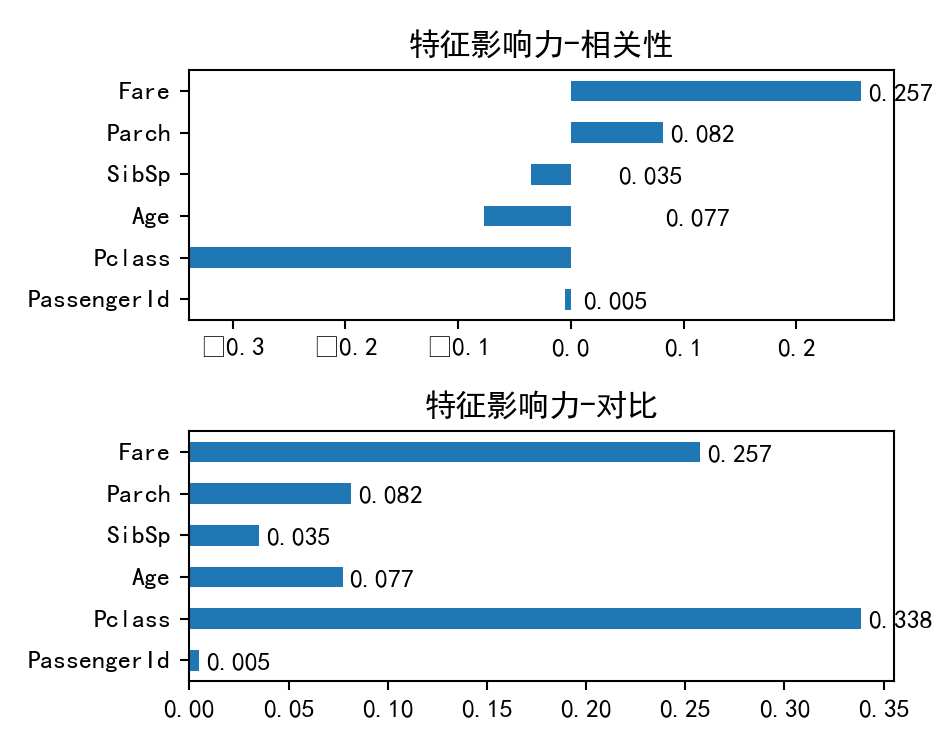

In [131]:
#各特征之间的关系
plt.figure(figsize=(5,4))
ax1=plt.subplot(2,1,1)
bars=data_train.corr().loc[:,'Survived'].drop(['Survived'],axis=0).plot.barh(ax=ax1)
setBarhLabels(bars)
plt.title("特征影响力-相关性")
ax2=plt.subplot(2,1,2)
bars=abs(data_train.corr().loc[:,'Survived'].drop(['Survived'],axis=0)).plot.barh(ax=ax2)
setBarhLabels(bars)
plt.title("特征影响力-对比")
plt.tight_layout()


<IPython.core.display.Javascript object>


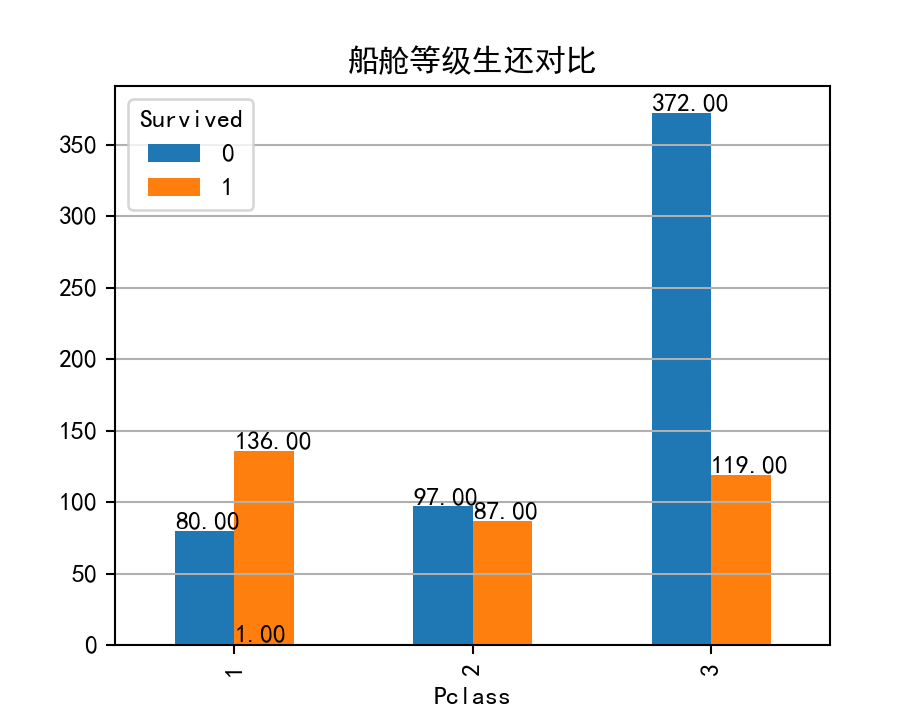

In [126]:
plt.figure(figsize=(5,4))
ax1=plt.subplot(1,1,1)
bars=data_train.groupby(by=['Pclass']).Survived.value_counts().unstack().plot.bar(ax=ax1);
setBarLabels(bars)
plt.grid(axis='y')
plt.title('船舱等级生还对比');

可以看出:  
Pclass=1 的生还人数比未生还人数多  
Pclass=2 的生还人数比未生还人数基本持平  
Pclass=3 的未生还人数远远高出生还人数  

# 数据预处理

## 1.缺失数据补齐

训练集数据：  
记录总数 : 891  
Age : 714  
Cabin : 204 缺失很多  
Embarked : 889 只确实2条  

测试集数据：  
记录总数 : 418  
Age : 332  
Cabin : 91 缺失很多

In [129]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [130]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
